In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [21]:
iterations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
              16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
              31, 32, 33, 34, 35, 36, 37, 38]

datasets = ['Shuttle', 'Covertype', 'KDD-99', 'Darknet']

metrics = {
    "F2": {
        "Shuttle": [0.9694, 0.9297, 0.3524, 0.9515, 0.1906, 0.8431, 0.7198, 0.8607, 0.6816, 0.8388, 0.6441, 0.8192, 0.8272, 0.8804, 0.7872,
                    0.9050, 0.7661, 0.8808, 0.9295, 0.9524, 0.9075, 0.7647, 0.8288, 0.7286, 0.6877, 0.7889, 0.8106, 0.9616, 0.9749, 0.9919,
                    0.9923, 0.9920, 0.9995, 0.9998, 0.9912, 0.9920, 0.9994, 0.9993],
        "Covertype": [0.4718, 0.4814, 0.2802, 0.5184, 0.2714, 0.3959, 0.2765, 0.2257, 0.1552, 0.1663, 0.1889, 0.1712, 0.1032, 0.4736, 0.1765,
                      0.4381, 0.2072, 0.4232, 0.4343, 0.4314, 0.4360, 0.1230, 0.1964, 0.2521, 0.1349, 0.2599, 0.1590, 0.5535, 0.4869, 0.7444,
                      0.7438, 0.7801, 0.8877, 0.8963, 0.7285, 0.7343, 0.8923, 0.8797],
        "KDD-99": [0.9573, 0.9539, 0.9443, 0.9512, 0.7167, 0.9501, 0.0095, 0.0096, 0.0141, 0.1025, 0.0039, 0.0525, 0.0468, 0.9462, 0.2971,
                0.9489, 0.0046, 0.9533, 0.9501, 0.9499, 0.9494, 0.2056, 0.2046, 0.9447, 0.9517, 0.9498, 0.9497, 0.9993, 0.9995, 0.8631,
                0.9976, 0.9961, 0.9999, 0.9999, 0.9981, 0.9994, 0.9999, 0.9999],
        "Darknet": [0.8501, 0.8460, 0.5732, 0.8755, 0.3119, 0.8603, 0.0934, 0.1418, 0.3376, 0.2725, 0.4155, 0.4152, 0.1885, 0.8315, 0.2726,
                    0.8376, 0.1696, 0.8454, 0.8621, 0.8651, 0.8312, 0.2167, 0.2766, 0.3864, 0.3013, 0.3951, 0.2912, 0.5724, 0.8297, 0.9883,
                    0.9904, 0.9908, 0.9996, 0.9996, 0.9903, 0.9890, 0.9995, 0.9995],
    },
    "MCC": {
        "Shuttle": [0.9170, 0.7963, 0.1331, 0.8673, 0.0381, 0.4495, 0.6710, 0.7208, 0.4884, 0.7159, 0.4562, 0.5858, 0.6684, 0.6456, 0.5462,
                    0.7147, 0.4689, 0.6082, 0.7899, 0.8602, 0.7349, 0.6062, 0.7018, 0.5228, 0.4956, 0.6438, 0.6303, 0.9014, 0.9316, 0.9793,
                    0.9801, 0.9775, 0.9986, 0.9995, 0.9773, 0.9790, 0.9982, 0.9982],
        "Covertype": [0.1506, 0.1630, 0.0009, 0.2114, 0.0048, 0.0602, 0.1305, 0.0631, 0.0575, 0.0576, 0.0522, 0.0647, 0.0555, 0.1437, 0.0597,
                      0.1028, 0.0691, 0.0918, 0.0980, 0.0867, 0.0932, 0.0551, 0.0835, 0.0872, 0.0519, 0.0925, 0.0628, 0.2832, 0.1802, 0.5962,
                      0.5968, 0.6471, 0.8195, 0.8334, 0.5812, 0.5776, 0.8278, 0.8074],
        "KDD-99": [0.3463, 0.2695, 0.0167, 0.1373, -0.0178, 0.1473, 0.0863, 0.0175, 0.0822, 0.0720, 0.0429, 0.0257, 0.0676, 0.0036, 0.0609,
                0.1051, 0.0574, 0.2811, 0.1666, 0.1730, 0.1381, 0.0758, 0.0755, 0.1096, 0.2080, 0.1490, 0.1428, 0.9923, 0.9939, 0.6098,
                0.9745, 0.9568, 0.9984, 0.9986, 0.9795, 0.9935, 0.9985, 0.9985],
        "Darknet": [0.2384, 0.2680, 0.0998, 0.4421, 0.0449, 0.2846, 0.1287, 0.1450, 0.2375, 0.1380, 0.2156, 0.2286, 0.1234, 0.1260, 0.1701,
                    0.1888, 0.0905, 0.2271, 0.3618, 0.3955, 0.1391, 0.1623, 0.1740, 0.0614, 0.0862, 0.1077, 0.0857, 0.3271, 0.6565, 0.9579,
                    0.9652, 0.9666, 0.9984, 0.9987, 0.9646, 0.9601, 0.9983, 0.9981],
    },
    "Macro Average Precision": {
        "Shuttle": [0.5686, 0.4900, 0.2257, 0.5147, 0.0678, 0.3845, 0.5578, 0.5977, 0.4777, 0.6000, 0.4095, 0.4632, 0.4903, 0.4017, 0.4456,
                    0.3935, 0.4567, 0.4493, 0.6268, 0.6407, 0.4080, 0.4620, 0.5910, 0.4794, 0.4719, 0.5702, 0.5485, 0.5755, 0.5838, 0.5367,
                    0.5599, 0.7655, 0.9927, 0.9987, 0.5497, 0.5981, 0.9591, 0.9526],
        "Covertype": [0.2434, 0.2649, 0.1300, 0.2899, 0.0878, 0.1538, 0.2117, 0.1913, 0.2027, 0.1589, 0.1881, 0.2046, 0.2091, 0.2132, 0.2144,
                      0.1915, 0.1768, 0.2582, 0.1953, 0.2195, 0.1759, 0.1773, 0.2198, 0.2067, 0.1911, 0.1844, 0.1745, 0.2773, 0.2211, 0.7008,
                      0.6818, 0.6537, 0.8940, 0.9048, 0.6884, 0.6907, 0.8518, 0.8343],
        "KDD-99": [0.1046, 0.1176, 0.0461, 0.0616, 0.0363, 0.0836, 0.0498, 0.0260, 0.0616, 0.0824, 0.0654, 0.0533, 0.0479, 0.0479, 0.0608,
                0.0622, 0.0571, 0.0811, 0.0595, 0.0925, 0.0676, 0.0679, 0.0694, 0.0860, 0.0734, 0.0754, 0.0647, 0.7950, 0.9419, 0.5455,
                0.5974, 0.7087, 0.8700, 0.9254, 0.5991, 0.9125, 0.8642, 0.8157],
        "Darknet": [0.2611, 0.1839, 0.1158, 0.3138, 0.0626, 0.2487, 0.1722, 0.2162, 0.2764, 0.1591, 0.2217, 0.2035, 0.1934, 0.1971, 0.1888,
                    0.1635, 0.1539, 0.1830, 0.3355, 0.2611, 0.1391, 0.2232, 0.2190, 0.1684, 0.1401, 0.1682, 0.1646, 0.3217, 0.4674, 0.9133,
                    0.9143, 0.8706, 0.9894, 0.9916, 0.9103, 0.9143, 0.9906, 0.9902],
    },
    "Weighted Average Precision": {
        "Shuttle": [0.9690, 0.9242, 0.4671, 0.9524, 0.2820, 0.8000, 0.9400, 0.9509, 0.8802, 0.9504, 0.8738, 0.8995, 0.9451, 0.8742, 0.9056,
                    0.8948, 0.8410, 0.8605, 0.9292, 0.9480, 0.9063, 0.9535, 0.9387, 0.9204, 0.9088, 0.9559, 0.9428, 0.9662, 0.9731, 0.9905,
                    0.9912, 0.9926, 0.9995, 0.9998, 0.9900, 0.9913, 0.9995, 0.9994],
        "Covertype": [0.4771, 0.4395, 0.2873, 0.4554, 0.2482, 0.3496, 0.4562, 0.3993, 0.5017, 0.3399, 0.3572, 0.3394, 0.4852, 0.4186, 0.4768,
                      0.4016, 0.3520, 0.4658, 0.4467, 0.3971, 0.3983, 0.3538, 0.4659, 0.4414, 0.4250, 0.3869, 0.3292, 0.5131, 0.4875, 0.7542,
                      0.7522, 0.7848, 0.8883, 0.8968, 0.7471, 0.7404, 0.8936, 0.8809],
        "KDD-99": [0.9364, 0.9344, 0.9127, 0.9219, 0.7273, 0.9235, 0.3870, 0.3836, 0.3692, 0.5775, 0.1972, 0.3825, 0.3808, 0.9127, 0.6992,
                0.9177, 0.5326, 0.9274, 0.9195, 0.9271, 0.9197, 0.4798, 0.4981, 0.9209, 0.9245, 0.9229, 0.9204, 0.9993, 0.9995, 0.9962,
                0.9977, 0.9966, 0.9998, 0.9999, 0.9982, 0.9994, 0.9998, 0.9998],
        "Darknet": [0.7818, 0.7833, 0.5972, 0.8364, 0.4574, 0.7902, 0.5423, 0.5453, 0.7321, 0.6696, 0.8697, 0.8635, 0.8568, 0.7582, 0.7931,
                    0.7613, 0.8366, 0.7725, 0.8163, 0.8218, 0.7495, 0.8752, 0.8308, 0.7856, 0.7451, 0.7262, 0.8045, 0.8482, 0.9040, 0.9886,
                    0.9905, 0.9921, 0.9996, 0.9996, 0.9904, 0.9890, 0.9995, 0.9995],
    },
    "Macro Average Recall (Balanced Accuracy)": {
        "Shuttle": [0.5501, 0.4227, 0.2220, 0.4601, 0.1432, 0.3525, 0.7252, 0.8396, 0.7446, 0.8140, 0.5935, 0.7009, 0.6652, 0.3368, 0.5599,
                    0.3671, 0.5565, 0.4037, 0.5597, 0.5322, 0.3705, 0.7309, 0.8753, 0.6009, 0.5951, 0.7022, 0.7035, 0.4941, 0.6022, 0.4498,
                    0.4584, 0.9473, 0.9450, 0.9270, 0.4548, 0.4791, 0.9820, 0.9502],
        "Covertype": [0.1912, 0.2042, 0.1358, 0.2265, 0.1491, 0.1563, 0.3385, 0.2216, 0.2458, 0.2315, 0.2307, 0.2158, 0.2213, 0.1895, 0.2360,
                      0.1674, 0.2166, 0.1548, 0.1660, 0.1674, 0.1672, 0.2274, 0.2749, 0.2844, 0.2455, 0.2777, 0.2436, 0.2849, 0.2210, 0.5260,
                      0.5209, 0.6823, 0.8503, 0.8660, 0.5392, 0.4987, 0.9039, 0.8844],
        "KDD-99": [0.0848, 0.0736, 0.0515, 0.0648, 0.0452, 0.0605, 0.1453, 0.0853, 0.1421, 0.1965, 0.1323, 0.1026, 0.1268, 0.0476, 0.1094,
                0.0608, 0.1161, 0.0751, 0.0633, 0.0615, 0.0647, 0.1799, 0.1304, 0.0712, 0.0668, 0.0614, 0.0608, 0.7441, 0.8611, 0.5158,
                0.5127, 0.7289, 0.7989, 0.8301, 0.5179, 0.8440, 0.8080, 0.7801],
        "Darknet": [0.2476, 0.1725, 0.1292, 0.2582, 0.1119, 0.2377, 0.2912, 0.4276, 0.4894, 0.3864, 0.4628, 0.3623, 0.3736, 0.1407, 0.3530,
                    0.1586, 0.3161, 0.1661, 0.2308, 0.2200, 0.1359, 0.4628, 0.4211, 0.2414, 0.2542, 0.2552, 0.2825, 0.3012, 0.3378, 0.8616,
                    0.8721, 0.9457, 0.9810, 0.9831, 0.8763, 0.8612, 0.9853, 0.9855],
    },
    "Weighted Average Recall (Accuracy)": {
        "Shuttle": [0.9699, 0.9338, 0.3784, 0.9538, 0.2246, 0.8649, 0.7138, 0.8465, 0.6738, 0.8232, 0.6296, 0.8130, 0.8111, 0.8919, 0.7789,
                    0.9126, 0.7597, 0.8944, 0.9341, 0.9554, 0.9133, 0.7407, 0.8200, 0.7029, 0.6628, 0.7720, 0.7914, 0.9647, 0.9760, 0.9926,
                    0.9929, 0.9919, 0.9995, 0.9998, 0.9900, 0.9926, 0.9994, 0.9994],
        "Covertype": [0.5338, 0.5393, 0.3213, 0.5685, 0.2986, 0.4712, 0.2804, 0.2438, 0.1488, 0.1715, 0.2052, 0.1997, 0.1248, 0.5339, 0.1935,
                      0.5083, 0.2353, 0.5001, 0.4993, 0.5012, 0.5045, 0.1348, 0.2126, 0.2800, 0.1443, 0.2698, 0.1830, 0.6045, 0.5531, 0.7510,
                      0.7505, 0.7817, 0.8881, 0.8966, 0.7360, 0.7401, 0.8924, 0.8798],
        "KDD-99": [0.9640, 0.9609, 0.9527, 0.9590, 0.7148, 0.9581, 0.0132, 0.0131, 0.0171, 0.0948, 0.0091, 0.0485, 0.0442, 0.9551, 0.2883,
                0.9571, 0.0121, 0.9604, 0.9580, 0.9577, 0.9575, 0.1979, 0.2008, 0.9523, 0.9593, 0.9579, 0.9577, 0.9993, 0.9995, 0.8415,
                0.9978, 0.9960, 0.9999, 0.9999, 0.9982, 0.9994, 0.9999, 0.9999],
        "Darknet": [0.8731, 0.8656, 0.5815, 0.8910, 0.3153, 0.8814, 0.0954, 0.1461, 0.3314, 0.2827, 0.3933, 0.4096, 0.1870, 0.8572, 0.2712,
                    0.8615, 0.1707, 0.8676, 0.8807, 0.8812, 0.8560, 0.2140, 0.2671, 0.3719, 0.2819, 0.3751, 0.2712, 0.5943, 0.8428, 0.9886,
                    0.9905, 0.9907, 0.9996, 0.9996, 0.9904, 0.9892, 0.9995, 0.9995],
    },
    "Macro Average F1 Score": {
        "Shuttle": [0.5289, 0.4400, 0.1610, 0.4701, 0.0508, 0.3545, 0.5394, 0.6287, 0.4918, 0.6123, 0.4014, 0.4773, 0.4857, 0.3477, 0.4158,
                    0.3732, 0.4315, 0.4105, 0.5736, 0.5656, 0.3769, 0.4534, 0.6339, 0.4624, 0.4537, 0.5595, 0.8480, 0.5050, 0.5815, 0.4573,
                    0.4701, 0.8248, 0.9622, 0.9509, 0.4658, 0.4999, 0.9660, 0.9433],
        "Covertype": [0.1617, 0.1770, 0.0804, 0.2038, 0.0908, 0.1146, 0.1786, 0.1238, 0.1069, 0.1063, 0.1177, 0.1201, 0.0779, 0.1596, 0.1054,
                      0.1334, 0.1045, 0.1185, 0.1314, 0.1384, 0.1322, 0.0918, 0.1343, 0.1419, 0.1001, 0.1516, 0.1032, 0.2626, 0.1868, 0.5441,
                      0.5370, 0.6310, 0.8697, 0.8834, 0.5612, 0.5187, 0.8751, 0.8566],
        "KDD-99": [0.0851, 0.0763, 0.0475, 0.0623, 0.0359, 0.0625, 0.0358, 0.0063, 0.0388, 0.0689, 0.0371, 0.0308, 0.0273, 0.0465, 0.0337,
                0.0602, 0.0314, 0.0735, 0.0613, 0.0610, 0.0640, 0.0494, 0.0441, 0.0680, 0.0653, 0.0607, 0.0603, 0.7640, 0.8914, 0.4661,
                0.5374, 0.7066, 0.8257, 0.8647, 0.5447, 0.8636, 0.8270, 0.7934],
        "Darknet": [0.2354, 0.1720, 0.1001, 0.2638, 0.0487, 0.2350, 0.1034, 0.1790, 0.2447, 0.1255, 0.1980, 0.1795, 0.1215, 0.1405, 0.1331,
                    0.1535, 0.0742, 0.1658, 0.2403, 0.2212, 0.1308, 0.1582, 0.1652, 0.1063, 0.0882, 0.1350, 0.1051, 0.2634, 0.3312, 0.8805,
                    0.8897, 0.9004, 0.9849, 0.9871, 0.8911, 0.8841, 0.9878, 0.9878],
    },
    "Weighted Average F1 Score": {
        "Shuttle": [0.9688, 0.9251, 0.3385, 0.9494, 0.1745, 0.8165, 0.7422, 0.8880, 0.7182, 0.8702, 0.6803, 0.8346, 0.8607, 0.8665, 0.8094,
                    0.8963, 0.7861, 0.8645, 0.9245, 0.9490, 0.9011, 0.8121, 0.8538, 0.7795, 0.7388, 0.8254, 0.8480, 0.9590, 0.9737, 0.9909,
                    0.9913, 0.9921, 0.9995, 0.9998, 0.9903, 0.9913, 0.9994, 0.9994],
        "Covertype": [0.4129, 0.4272, 0.2462, 0.4695, 0.2524, 0.3286, 0.3022, 0.2269, 0.1928, 0.1899, 0.1967, 0.1641, 0.1125, 0.4170, 0.1855,
                      0.3715, 0.2042, 0.3523, 0.3720, 0.3652, 0.3712, 0.1457, 0.2101, 0.2492, 0.1542, 0.2756, 0.1605, 0.5068, 0.4252, 0.7389,
                      0.7385, 0.7800, 0.8876, 0.8962, 0.7249, 0.7287, 0.8925, 0.8798],
        "KDD-99": [0.9476, 0.9437, 0.9322, 0.9399, 0.7201, 0.9384, 0.0100, 0.0129, 0.0166, 0.1369, 0.0040, 0.0718, 0.0636, 0.9331, 0.3278,
                0.9368, 0.0038, 0.9429, 0.9384, 0.9384, 0.9378, 0.2411, 0.2254, 0.9341, 0.9405, 0.9381, 0.9380, 0.9993, 0.9995, 0.9034,
                0.9975, 0.9962, 0.9998, 0.9999, 0.9980, 0.9994, 0.9999, 0.9999],
        "Darknet": [0.8186, 0.8195, 0.5745, 0.8550, 0.3337, 0.8314, 0.1239, 0.1685, 0.3877, 0.2912, 0.5002, 0.4838, 0.2362, 0.7965, 0.3149,
                    0.8048, 0.2209, 0.8148, 0.8377, 0.8437, 0.7972, 0.2695, 0.3387, 0.4310, 0.3602, 0.4446, 0.3518, 0.5647, 0.8202, 0.9880,
                    0.9904, 0.9911, 0.9996, 0.9996, 0.9903, 0.9889, 0.9995, 0.9995],
    }
}

In [22]:
import numpy as np

def generate_latex_table(iteration, metrics):
    """
    Generates a LaTeX table for a given iteration of NN performance metrics.

    Parameters:
    - iteration (int): The index of the iteration to extract values for.
    - metrics (dict): Dictionary containing performance metrics for different datasets.
                      Keys are metric names, values are dictionaries (dataset -> list of values).
    """
    datasets = list(next(iter(metrics.values())).keys())  # Get dataset names from any metric
    metric_names = [
    "F2", "MCC", 
    "Weighted Average Precision", "Weighted Average Recall (Accuracy)", "Weighted Average F1 Score",
    "Macro Average Precision", "Macro Average Recall (Balanced Accuracy)", "Macro Average F1 Score"
]
    metric_names_table = ["F2", r"\ac{MCC}", r"\ac{WAP}", r"\ac{WAR}", r"\ac{WAF1}", r"\ac{MAP}", r"\ac{MAR}", r"\ac{MAF1}"]
    
    # Extract the relevant iteration's data and calculate averages
    table_data = {}
    for dataset in datasets:
        row_values = [metrics[metric][dataset][iteration-1] for metric in metric_names]  # Extract 8 metrics
        row_avg = np.mean(row_values)  # Compute row average
        table_data[dataset] = row_values + [row_avg]  # Add average as last column
    
    # Compute overall average of all metrics
    overall_avg = np.mean([val for dataset_values in table_data.values() for val in dataset_values])

    # LaTeX Table Formatting using a raw string
    latex_table = r"""\begin{table}[h]
\small
\centering
\begin{tabular}{|l||c|c|c|c|c|c|c|c||c|}
\hline
"""  
    header_row = "& " + " & ".join(metric_names_table) + " & Avg. \\\\\n\\hline\\hline\n"
    latex_table += header_row

    for dataset, values in table_data.items():
        latex_table += f"{dataset} & " + " & ".join(f"{v:.4f}" for v in values) + r" \\" + "\n"

    latex_table += r"""\hline\hline
Overall & """ + " & ".join([""] * 9) + f"{overall_avg:.4f} \\\\ \n\\hline\n" + r"""\end{tabular}
\caption{Performance Metrics for Architecture Version """ + str(iteration) + r"""}
\label{table:metrics_iteration_""" + str(iteration) + r"""}
\end{table}"""

    return latex_table


print(generate_latex_table(38, metrics))

\begin{table}[h]
\small
\centering
\begin{tabular}{|l||c|c|c|c|c|c|c|c||c|}
\hline
& F2 & \ac{MCC} & \ac{WAP} & \ac{WAR} & \ac{WAF1} & \ac{MAP} & \ac{MAR} & \ac{MAF1} & Avg. \\
\hline\hline
Shuttle & 0.9993 & 0.9982 & 0.9994 & 0.9994 & 0.9994 & 0.9526 & 0.9502 & 0.9433 & 0.9802 \\
Covertype & 0.8797 & 0.8074 & 0.8809 & 0.8798 & 0.8798 & 0.8343 & 0.8844 & 0.8566 & 0.8629 \\
KDD-99 & 0.9999 & 0.9985 & 0.9998 & 0.9999 & 0.9999 & 0.8157 & 0.7801 & 0.7934 & 0.9234 \\
Darknet & 0.9995 & 0.9981 & 0.9995 & 0.9995 & 0.9995 & 0.9902 & 0.9855 & 0.9878 & 0.9950 \\
\hline\hline
Overall &  &  &  &  &  &  &  &  & 0.9404 \\ 
\hline
\end{tabular}
\caption{Performance Metrics for Architecture Version 38}
\label{table:metrics_iteration_38}
\end{table}


In [23]:
# Comparison baseline values for XGBoost and eLCS
comparison_values = {
    "F2": {
        "XGBoost": {"Shuttle": 0.9997, "Covertype": 0.8692, "KDD-99": 0.9998, "Darknet": 0.9997},
        "eLCS": {"Shuttle": 0.8163, "Covertype": 0.6722, "KDD-99": 0.9888, "Darknet": 0.9451},
        "TabNet": {"Shuttle": 0.9971, "Covertype": 0.8593, "KDD-99": 0.9969, "Darknet": 0.9969},
    },
    "MCC": {
        "XGBoost": {"Shuttle": 0.9993, "Covertype": 0.7895, "KDD-99": 0.9980, "Darknet": 0.9991},
        "eLCS": {"Shuttle": 0.5102, "Covertype": 0.4706, "KDD-99": 0.8760, "Darknet": 0.8045},
        "TabNet": {"Shuttle": 0.9924, "Covertype": 0.7743, "KDD-99": 0.9665, "Darknet": 0.9886},
    },
    "Macro Average Precision": {
        "XGBoost": {"Shuttle": 0.9997, "Covertype": 0.8839, "KDD-99": 0.8090, "Darknet": 0.9948},
        "eLCS": {"Shuttle": 0.2885, "Covertype": 0.4571, "KDD-99": 0.2967, "Darknet": 0.6752},
        "TabNet": {"Shuttle": 0.7532, "Covertype": 0.8206, "KDD-99": 0.4139, "Darknet": 0.9551},
    },
    "Weighted Average Precision": {
        "XGBoost": {"Shuttle": 0.9997, "Covertype": 0.8697, "KDD-99": 0.9998, "Darknet": 0.9997},
        "eLCS": {"Shuttle": 0.7433, "Covertype": 0.6652, "KDD-99": 0.9864, "Darknet": 0.9440},
        "TabNet": {"Shuttle": 0.9969, "Covertype": 0.8606, "KDD-99": 0.9968, "Darknet": 0.9969},
    },
    "Macro Average Recall (Balanced Accuracy)": {
        "XGBoost": {"Shuttle": 0.9243, "Covertype": 0.8319, "KDD-99": 0.7351, "Darknet": 0.9890},
        "eLCS": {"Shuttle": 0.2866, "Covertype": 0.3532, "KDD-99": 0.2182, "Darknet": 0.4195},
        "TabNet": {"Shuttle": 0.6416, "Covertype": 0.7323, "KDD-99": 0.3901, "Darknet": 0.9525},
    },
    "Weighted Average Recall (Accuracy)": {
        "XGBoost": {"Shuttle": 0.9997, "Covertype": 0.8696, "KDD-99": 0.9998, "Darknet": 0.9997},
        "eLCS": {"Shuttle": 0.8451, "Covertype": 0.6833, "KDD-99": 0.9898, "Darknet": 0.9500},
        "TabNet": {"Shuttle": 0.9973, "Covertype": 0.8603, "KDD-99": 0.9971, "Darknet": 0.9969},
    },
    "Macro Average F1 Score": {
        "XGBoost": {"Shuttle": 0.9501, "Covertype": 0.8539, "KDD-99": 0.7628, "Darknet": 0.9918},
        "eLCS": {"Shuttle": 0.2768, "Covertype": 0.3594, "KDD-99": 0.2357, "Darknet": 0.4494},
        "TabNet": {"Shuttle": 0.6690, "Covertype": 0.7650, "KDD-99": 0.3929, "Darknet": 0.9531},
    },
    "Weighted Average F1 Score": {
        "XGBoost": {"Shuttle": 0.9997, "Covertype": 0.8690, "KDD-99": 0.9998, "Darknet": 0.9997},
        "eLCS": {"Shuttle": 0.7780, "Covertype": 0.6600, "KDD-99": 0.9875, "Darknet": 0.9390},
        "TabNet": {"Shuttle": 0.9968, "Covertype": 0.8587, "KDD-99": 0.9966, "Darknet": 0.9969},
    }
}

In [24]:
import numpy as np

def generate_latex_table_alg(algorithm, metrics):
    datasets = ["Shuttle", "Covertype", "KDD-99", "Darknet"]  # Get dataset names from any metric
    metric_names = [
    "F2", "MCC", 
    "Weighted Average Precision", "Weighted Average Recall (Accuracy)", "Weighted Average F1 Score",
    "Macro Average Precision", "Macro Average Recall (Balanced Accuracy)", "Macro Average F1 Score"
]
    metric_names_table = ["F2", r"\ac{MCC}", r"\ac{WAP}", r"\ac{WAR}", r"\ac{WAF1}", r"\ac{MAP}", r"\ac{MAR}", r"\ac{MAF1}"]
    
    # Extract the relevant iteration's data and calculate averages
    table_data = {}
    for dataset in datasets:
        row_values = [metrics[metric][algorithm][dataset] for metric in metric_names]  # Extract 8 metrics
        row_avg = np.mean(row_values)  # Compute row average
        table_data[dataset] = row_values + [row_avg]  # Add average as last column
    
    # Compute overall average of all metrics
    overall_avg = np.mean([val for dataset_values in table_data.values() for val in dataset_values])

    # LaTeX Table Formatting using a raw string
    latex_table = r"""\begin{table}[h]
\small
\centering
\begin{tabular}{|l||c|c|c|c|c|c|c|c||c|}
\hline
"""  
    header_row = "& " + " & ".join(metric_names_table) + " & Avg. \\\\\n\\hline\\hline\n"
    latex_table += header_row

    for dataset, values in table_data.items():
        latex_table += f"{dataset} & " + " & ".join(f"{v:.4f}" for v in values) + r" \\" + "\n"

    latex_table += r"""\hline\hline
Overall & """ + " & ".join([""] * 9) + f"{overall_avg:.4f} \\\\ \n\\hline\n" + r"""\end{tabular}
\caption{Performance Metrics for """ + algorithm + r"""}
\label{table:metrics_""" + algorithm + r"""}
\end{table}"""

    return latex_table


print(generate_latex_table_alg("TabNet", comparison_values))

\begin{table}[h]
\small
\centering
\begin{tabular}{|l||c|c|c|c|c|c|c|c||c|}
\hline
& F2 & \ac{MCC} & \ac{WAP} & \ac{WAR} & \ac{WAF1} & \ac{MAP} & \ac{MAR} & \ac{MAF1} & Avg. \\
\hline\hline
Shuttle & 0.9971 & 0.9924 & 0.9969 & 0.9973 & 0.9968 & 0.7532 & 0.6416 & 0.6690 & 0.8805 \\
Covertype & 0.8593 & 0.7743 & 0.8606 & 0.8603 & 0.8587 & 0.8206 & 0.7323 & 0.7650 & 0.8164 \\
KDD-99 & 0.9969 & 0.9665 & 0.9968 & 0.9971 & 0.9966 & 0.4139 & 0.3901 & 0.3929 & 0.7689 \\
Darknet & 0.9969 & 0.9886 & 0.9969 & 0.9969 & 0.9969 & 0.9551 & 0.9525 & 0.9531 & 0.9796 \\
\hline\hline
Overall &  &  &  &  &  &  &  &  & 0.8613 \\ 
\hline
\end{tabular}
\caption{Performance Metrics for TabNet}
\label{table:metrics_TabNet}
\end{table}


In [25]:
# Define colors for datasets
dataset_colors = {
    "Shuttle": "b",
    "Covertype": "g",
    "KDD-99": "r",
    "Darknet": "gray",
}

# Helper function to adjust brightness of a color
def adjust_brightness(color, factor):
    rgb = mcolors.to_rgb(color)
    return tuple(min(max(c * factor, 0), 1) for c in rgb)

In [26]:
selected_iterations = iterations
#selected_iterations = [1, 31, 32, 33, 34, 35]

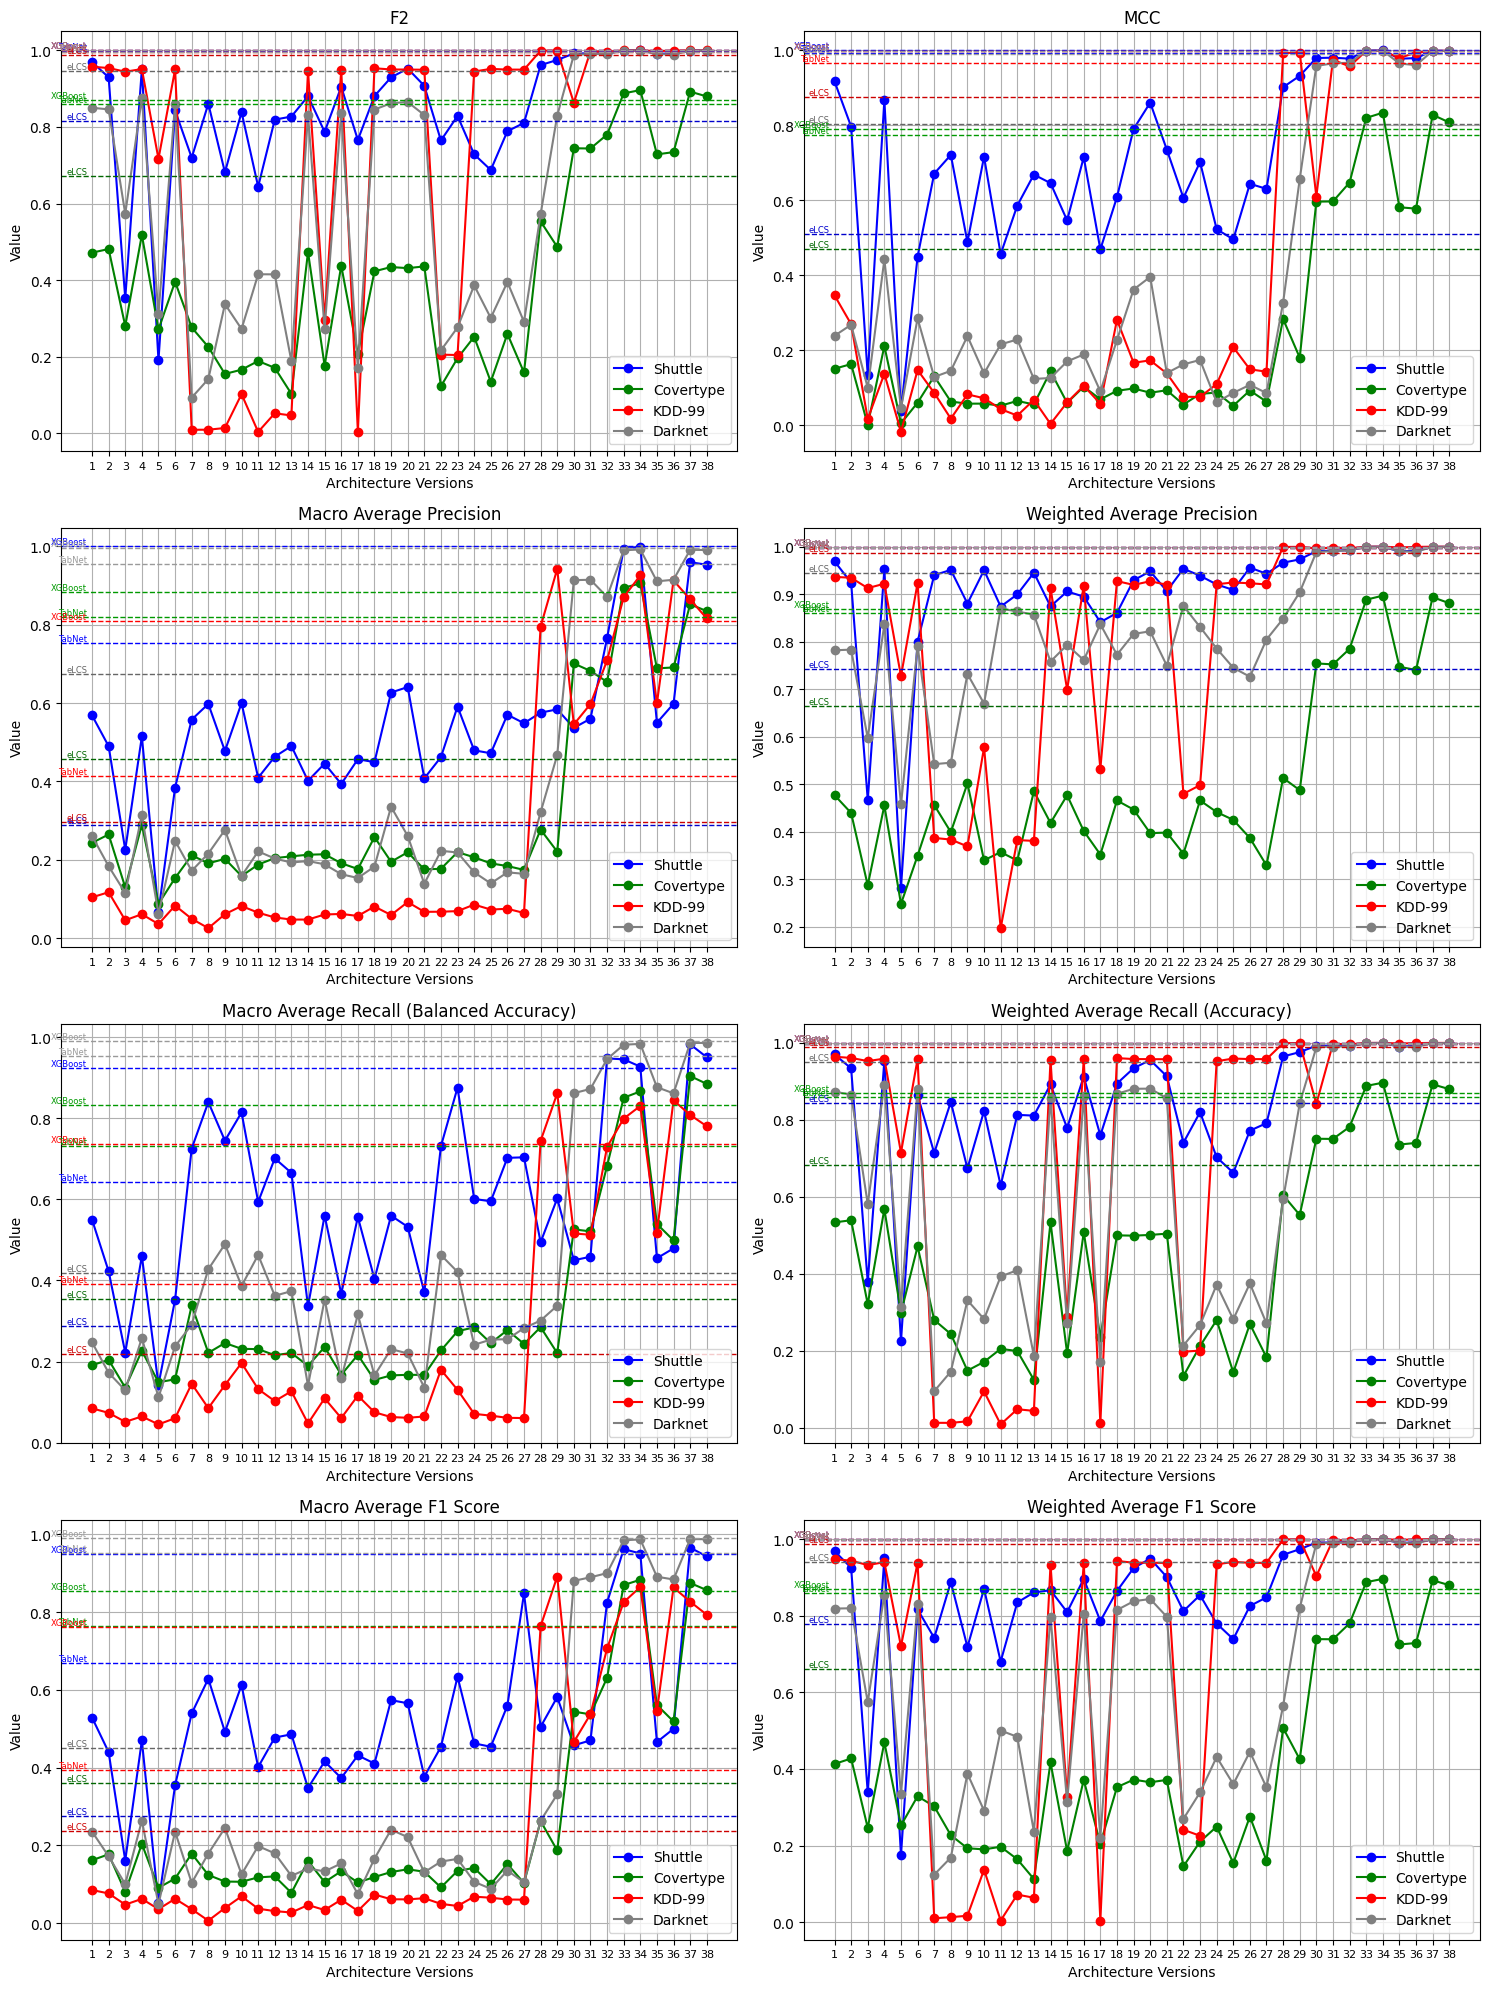

In [27]:
# List of metrics to plot
metric_names = [
    #"ROC-AUC", "PR-AUC",
    "F2", "MCC", 
    "Macro Average Precision", "Weighted Average Precision", 
    "Macro Average Recall (Balanced Accuracy)", "Weighted Average Recall (Accuracy)", 
    "Macro Average F1 Score", "Weighted Average F1 Score"
]

plot_iters = [str(i) for i in np.intersect1d(iterations, selected_iterations)]

# Set up the figure and subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Iterate through the metrics and plot each one
for i, metric in enumerate(metric_names):
    if metric in metrics:
        ax = axes[i]
        for dataset in datasets:
            # Plot the dataset's line
            metric_on_plot = [metrics[metric][dataset][i-1] for i in selected_iterations]
            ax.plot(plot_iters, metric_on_plot, label=dataset, marker='o', color=dataset_colors[dataset])
        
    # Add horizontal dashed lines for XGBoost and eLCS
    if metric in comparison_values:
        xgboost_values = comparison_values[metric].get("XGBoost", {})
        elcs_values = comparison_values[metric].get("eLCS", {})
        tabnet_values = comparison_values[metric].get("TabNet", {})
            
        for dataset in datasets:
            # Dashed line for XGBoost
            if dataset in xgboost_values:
                xgboost_value = xgboost_values[dataset]
                dashed_color = adjust_brightness(dataset_colors[dataset], 1.2)  # Slightly brighter
                ax.axhline(y=xgboost_value, color=dashed_color, linestyle='--', linewidth=1)
                ax.text(int(plot_iters[0]) - 1.3, xgboost_value, 'XGBoost', 
                        color=dashed_color, fontsize=6, va='bottom', ha='right')

            # Dashed line for eLCS
            if dataset in elcs_values:
                elcs_value = elcs_values[dataset]
                dashed_color = adjust_brightness(dataset_colors[dataset], 0.8)  # Slightly darker
                ax.axhline(y=elcs_value, color=dashed_color, linestyle='--', linewidth=1)
                ax.text(int(plot_iters[0]) - 1.3, elcs_value, 'eLCS', 
                        color=dashed_color, fontsize=6, va='bottom', ha='right')
                
            # Dashed line for TabNet
            if dataset in tabnet_values:
                tabnet_value = tabnet_values[dataset]
                dashed_color = adjust_brightness(dataset_colors[dataset], 1.2)  # Slightly brighter
                ax.axhline(y=tabnet_value, color=dashed_color, linestyle='--', linewidth=1)
                ax.text(int(plot_iters[0]) - 1.3, tabnet_value, 'TabNet', 
                        color=dashed_color, fontsize=6, va='bottom', ha='right')

        ax.set_title(metric)
        ax.set_xlabel('Architecture Versions')
        ax.set_xticks(np.arange(len(plot_iters)))
        ax.set_xticklabels(plot_iters, fontsize=8)
        ax.set_ylabel('Value')
        ax.legend()
        ax.grid(True)
    else:
        # If no data for a metric, skip its subplot
        axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

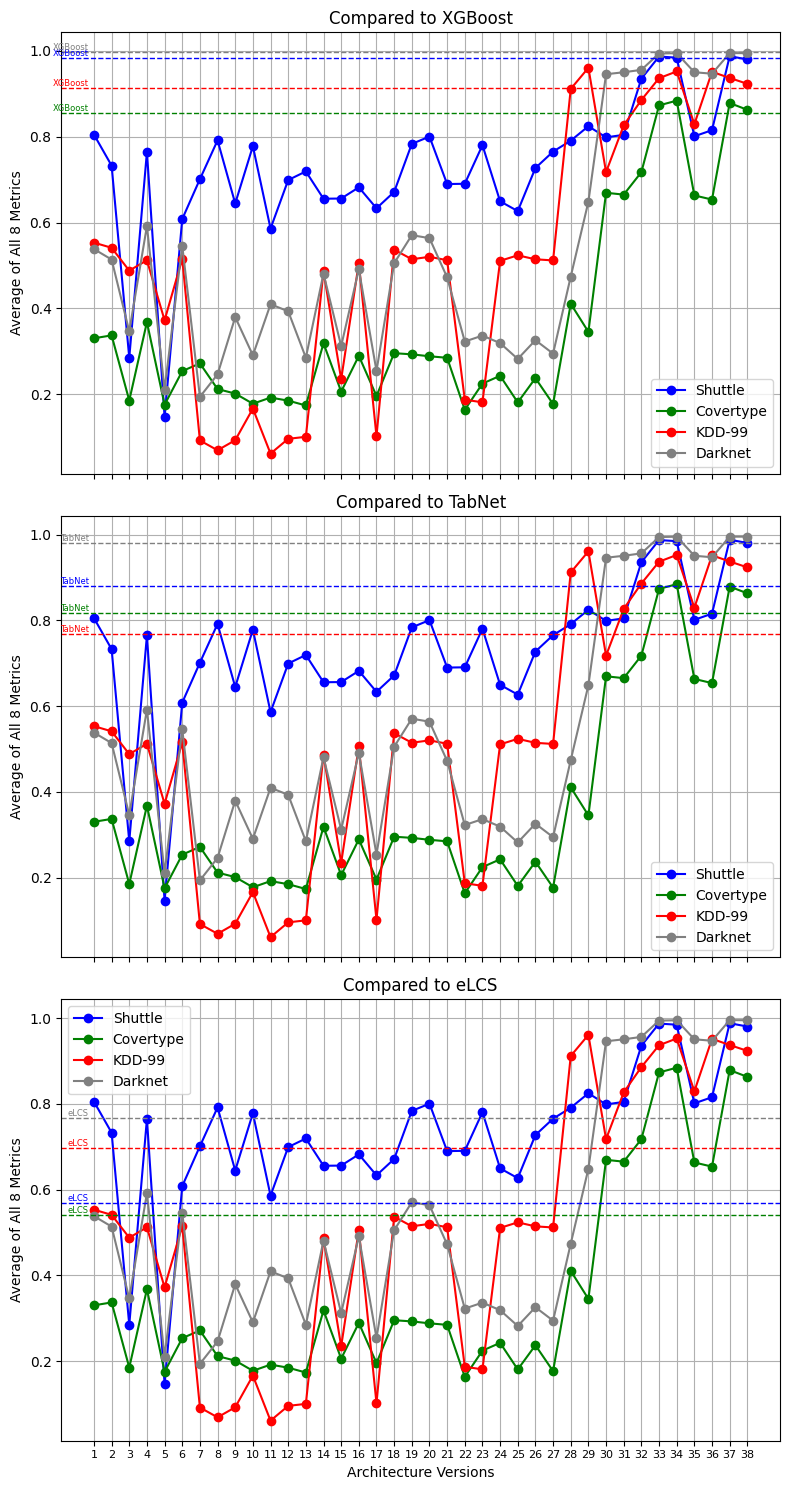

In [28]:
# Create figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 15), sharex=True, sharey=True)
titles = ['Compared to XGBoost',
          'Compared to TabNet', 'Compared to eLCS']

goodness_factors = {dataset: [] for dataset in datasets}

for dataset in datasets:
    for iteration in iterations:
        metric_values = []
        for metric in metric_names:
            if metric in metrics:
                try:
                    metric_values.append(metrics[metric][dataset][iteration - 1])
                except (IndexError, KeyError):
                    pass
        if metric_values:
            goodness_factors[dataset].append(np.mean(metric_values))
        else:
            goodness_factors[dataset].append(None)

plot_iters = [str(i) for i in iterations]

for ax, title, model_key in zip(axes, titles, ["XGBoost", "TabNet", "eLCS"]):
    for dataset, values in goodness_factors.items():
        ax.plot(plot_iters, values, label=f'{dataset}', marker='o', color=dataset_colors[dataset])
    
    if comparison_values:
        for dataset in datasets:
            model_avg = []
            for metric in metric_names:
                if metric in comparison_values:
                    model_value = comparison_values[metric][model_key].get(dataset, np.nan)
                    if not np.isnan(model_value):
                        model_avg.append(model_value)
            if model_avg:
                model_goodness = np.nanmean(model_avg)
                dashed_color = dataset_colors[dataset]
                ax.axhline(y=model_goodness, color=dashed_color, linestyle='--', linewidth=1)
                ax.text(int(plot_iters[0]) - 1.3, model_goodness, model_key, color=dashed_color, fontsize=6, va='bottom', ha='right')
    
    ax.set_title(title)
    ax.set_ylabel('Average of All 8 Metrics')
    ax.set_xticks(range(len(plot_iters)))
    ax.set_xticklabels(plot_iters, fontsize=8)
    ax.grid(True)
    ax.legend()

axes[2].set_xlabel('Architecture Versions')
plt.tight_layout()
plt.show()

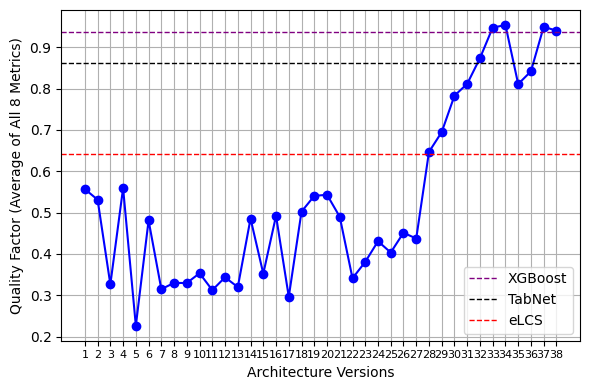

In [29]:
# Calculate the Goodness Factor for each iteration
# Ensure that all metrics are included in the average only if they have valid data
iterations = np.array(selected_iterations)
plot_iters = [str(i) for i in iterations]
goodness_factor = []

for iteration in iterations:
    metric_values = []
    for metric in metric_names:
        if metric in metrics:
            for dataset in datasets:
                try:
                    metric_values.append(metrics[metric][dataset][iteration - 1])
                except (IndexError, KeyError):
                    # Skip if data for this metric/dataset/iteration is not available
                    pass
    if metric_values:
        goodness_factor.append(np.mean(metric_values))
    else:
        goodness_factor.append(None)

# Plot the Goodness Factor
plt.figure(figsize=(6, 4))
plt.plot(plot_iters, goodness_factor, marker='o', color='blue')

# Add horizontal dashed lines for XGBoost and eLCS Goodness Factors if data is available
if comparison_values:
    xgboost_avg = []
    elcs_avg = []
    tabnet_avg = []
    for metric in metric_names:
        if metric in comparison_values:
            xgboost_values = [comparison_values[metric]["XGBoost"].get(dataset, np.nan) for dataset in datasets]
            elcs_values = [comparison_values[metric]["eLCS"].get(dataset, np.nan) for dataset in datasets]
            tabnet_values = [comparison_values[metric]["TabNet"].get(dataset, np.nan) for dataset in datasets]

            xgboost_avg.append(np.nanmean(xgboost_values))
            elcs_avg.append(np.nanmean(elcs_values))
            tabnet_avg.append(np.nanmean(tabnet_values))

    if xgboost_avg:
        xgboost_goodness = np.nanmean(xgboost_avg)
        plt.axhline(y=xgboost_goodness, color='purple', linestyle='--', linewidth=1, label='XGBoost')

    if tabnet_avg:
        tabnet_goodness = np.nanmean(tabnet_avg)
        plt.axhline(y=tabnet_goodness, color='black', linestyle='--', linewidth=1, label='TabNet')

    if elcs_avg:
        elcs_goodness = np.nanmean(elcs_avg)
        plt.axhline(y=elcs_goodness, color='red', linestyle='--', linewidth=1, label='eLCS')

# Add titles and labels
#plt.title('Average of All Metrics Across Versions for All Datasets')
plt.xlabel('Architecture Versions')
plt.xticks(fontsize=8)
plt.ylabel('Quality Factor (Average of All 8 Metrics)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

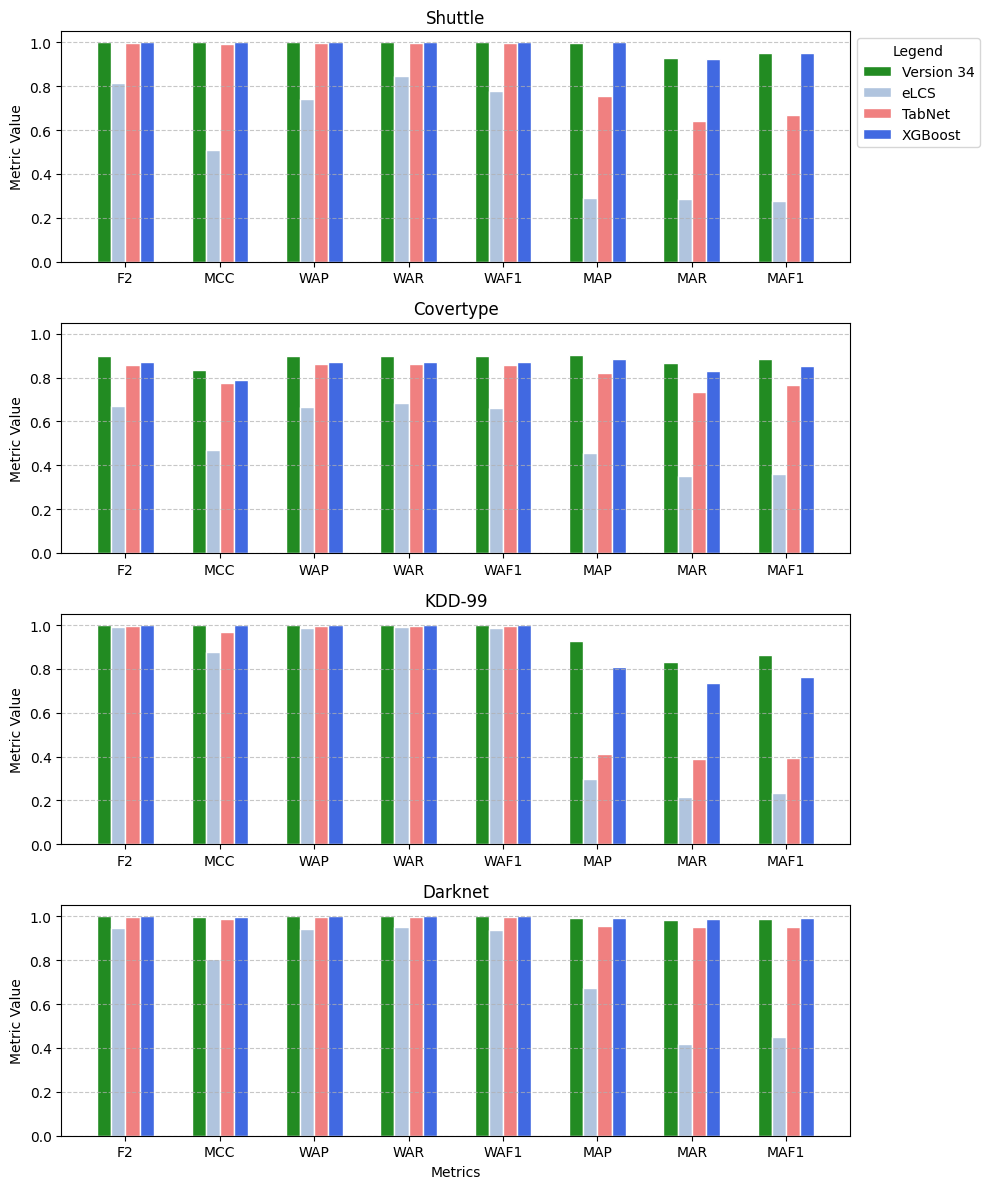

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data Generation
datasets = ["Shuttle", "Covertype", "KDD-99", "Darknet"]
metrics = ["F2", "MCC", "WAP", "WAR", "WAF1", "MAP", "MAR", "MAF1"]
models = ["Version 34", "eLCS", "TabNet", "XGBoost"]

# Placeholder values (replace with your actual data)
your_values = {
    "Shuttle": [
        [0.9998, 0.9995, 0.9998, 0.9998, 0.9998, 0.9987, 0.9270, 0.9509],  # Model
        [0.8163, 0.5102, 0.7433, 0.8451, 0.7780, 0.2885, 0.2866, 0.2768 ],  # elcs
        [0.9971, 0.9924, 0.9969, 0.9973, 0.9968, 0.7532, 0.6416, 0.6690],   # tn
        [0.9997, 0.9993, 0.9997, 0.9997, 0.9997, 0.9997, 0.9243, 0.9501]   # xgb
    ],
    "Covertype": [
        [0.8963, 0.8334, 0.8968, 0.8966, 0.8962, 0.9048, 0.8660, 0.8834],
        [0.6722, 0.4706, 0.6652, 0.6833, 0.6600, 0.4571, 0.3532, 0.3594],
        [0.8593, 0.7743, 0.8606, 0.8603, 0.8587, 0.8206, 0.7323, 0.7650],
        [0.8692, 0.7895, 0.8697, 0.8696, 0.8690, 0.8839, 0.8319, 0.8539]
    ],
    "KDD-99": [
        [0.9999, 0.9986, 0.9999, 0.9999, 0.9999, 0.9254, 0.8301, 0.8647],
        [0.9888, 0.8760, 0.9864, 0.9898, 0.9875, 0.2967, 0.2182, 0.2357],
        [0.9969, 0.9665, 0.9968, 0.9971, 0.9966, 0.4139, 0.3901, 0.3929],
        [0.9998, 0.9980, 0.9998, 0.9998, 0.9998, 0.8090, 0.7351, 0.7628]
    ],
    "Darknet": [
        [0.9996, 0.9987, 0.9996, 0.9996, 0.9996, 0.9916, 0.9831, 0.9871],
        [0.9451, 0.8045, 0.9440, 0.9500, 0.9390, 0.6752, 0.4195, 0.4494],
        [0.9969, 0.9886, 0.9969, 0.9969, 0.9969, 0.9551, 0.9525, 0.9531],
        [0.9997, 0.9991, 0.9997, 0.9997, 0.9997, 0.9948, 0.9890, 0.9918]
    ]
}

# Matplotlib settings
colors = ["forestgreen", "lightsteelblue", "lightcoral", "royalblue"]  # One color per model
bar_width = 0.15  # Slimmer bars
bar_spacing = 0  # More space between metric groups
x_positions = np.arange(len(metrics)) * (1 + bar_spacing)  # Spread out the metric groups

# Create figure and subplots
fig, axes = plt.subplots(nrows=len(datasets), ncols=1, figsize=(10, 12))

# Loop through datasets and create subplots
for i, dataset in enumerate(datasets):
    ax = axes[i]

    # Plot bars for each model
    for j, model in enumerate(models):
        values = your_values[dataset][j]  # Extract the correct row of values
        ax.bar(x_positions + j * bar_width, values, width=bar_width, label=model if i == 0 else "", color=colors[j], edgecolor = "white")

    # Formatting
    ax.set_title(dataset)
    ax.set_ylabel("Metric Value")
    ax.set_ylim(0, 1.05)
    ax.grid(True, linestyle="--", alpha=0.7, axis="y")
    ax.set_xticks(x_positions + (bar_width * (len(models) - 1) / 2))  # Center the labels
    ax.set_xticklabels(metrics)

# Add common legend only to the top subplot
axes[0].legend(title="Legend", bbox_to_anchor=(1, 1), loc='upper left')

# Overall title and layout adjustments
plt.xlabel("Metrics")
#plt.suptitle("Model Comparison Across Datasets and Metrics", fontsize=14, y=1)
plt.tight_layout()
plt.show()


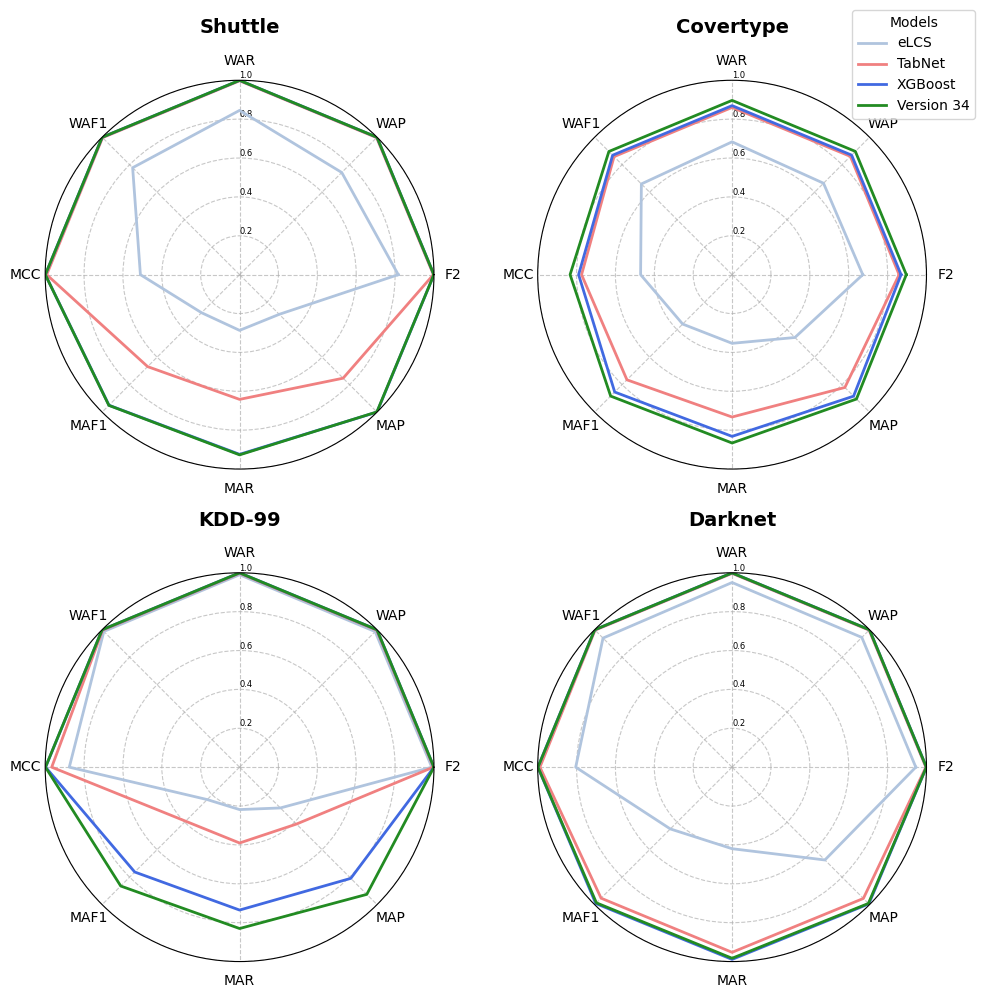

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Updated metric order
metrics = ["F2", "WAP", "WAR", "WAF1", "MCC", "MAF1", "MAR", "MAP"]

datasets = ["Shuttle", "Covertype", "KDD-99", "Darknet"]
models = ["eLCS", "TabNet", "XGBoost", "Version 34"]
colors = ["lightsteelblue", "lightcoral", "royalblue", "forestgreen"]

# Reordered values for each dataset to match new metric order
your_values = {
    "Shuttle": [
        [0.8163, 0.7433, 0.8451, 0.7780, 0.5102, 0.2768, 0.2866, 0.2885],  
        [0.9971, 0.9969, 0.9973, 0.9968, 0.9924, 0.6690, 0.6416, 0.7532],  
        [0.9997, 0.9997, 0.9997, 0.9997, 0.9993, 0.9501, 0.9243, 0.9997],
        [0.9998, 0.9998, 0.9998, 0.9998, 0.9995, 0.9509, 0.9270, 0.9987]
    ],
    "Covertype": [
        [0.6722, 0.6652, 0.6833, 0.6600, 0.4706, 0.3594, 0.3532, 0.4571],
        [0.8593, 0.8606, 0.8603, 0.8587, 0.7743, 0.7650, 0.7323, 0.8206],
        [0.8692, 0.8697, 0.8696, 0.8690, 0.7895, 0.8539, 0.8319, 0.8839],
        [0.8963, 0.8968, 0.8966, 0.8962, 0.8334, 0.8834, 0.8660, 0.9048]
    ],
    "KDD-99": [
        [0.9888, 0.9864, 0.9898, 0.9875, 0.8760, 0.2357, 0.2182, 0.2967],
        [0.9969, 0.9968, 0.9971, 0.9966, 0.9665, 0.3929, 0.3901, 0.4139],
        [0.9998, 0.9998, 0.9998, 0.9998, 0.9980, 0.7628, 0.7351, 0.8090],
        [0.9999, 0.9999, 0.9999, 0.9999, 0.9986, 0.8647, 0.8301, 0.9254]
    ],
    "Darknet": [
        [0.9451, 0.9440, 0.9500, 0.9390, 0.8045, 0.4494, 0.4195, 0.6752],
        [0.9969, 0.9969, 0.9969, 0.9969, 0.9886, 0.9531, 0.9525, 0.9551],
        [0.9997, 0.9997, 0.9997, 0.9997, 0.9991, 0.9918, 0.9890, 0.9948],
        [0.9996, 0.9996, 0.9996, 0.9996, 0.9987, 0.9871, 0.9831, 0.9916]
    ]
}

# Set up angles for the radar chart
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Create figure with subplots for each dataset
fig, axes = plt.subplots(nrows=2, ncols=2, subplot_kw={'projection': 'polar'}, figsize=(10, 10))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through datasets and create radar charts
for i, dataset in enumerate(datasets):
    ax = axes[i]

    # Plot each model
    for j, model in enumerate(models):
        values = your_values[dataset][j]
        values += values[:1]  # Close the loop
        ax.plot(angles, values, label=model, color=colors[j], linewidth=2)

    # Formatting
    ax.set_title(dataset, fontsize=14, fontweight="heavy", pad=15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    ax.set_ylim(0, 1)
    ax.grid(True, linestyle="--", alpha=0.7)

    # Move radial (y-axis) ticks to the 12 o'clock position
    ax.set_rlabel_position(90)  # 0 degrees → 12 o'clock
    ax.yaxis.set_tick_params(labelsize=6)  # Adjust label size if needed

# Add common legend outside
fig.legend(models, loc="upper right", bbox_to_anchor=(1, 1), title="Models")

# Overall layout
#plt.suptitle("Model Comparison Across Datasets and Metrics", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
